In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
df.groupby('class').count()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
e,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
p,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916


In [7]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [9]:
lst = [i for i in range(50)]
for column_name in df.columns:
    indexes = df[column_name].value_counts().index
    df[column_name].replace(indexes, lst[:len(indexes)], inplace=True)

In [10]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,0,1,0,1,6,0,0,1,7,...,0,0,0,0,0,0,0,2,2,4
1,0,0,1,3,1,4,0,0,0,7,...,0,0,0,0,0,0,0,1,3,1
2,0,3,1,4,1,5,0,0,0,3,...,0,0,0,0,0,0,0,1,3,5
3,1,0,0,4,1,6,0,0,1,3,...,0,0,0,0,0,0,0,2,2,4
4,0,0,1,1,0,0,0,1,0,7,...,0,0,0,0,0,0,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,2,1,0,0,0,1,0,0,9,...,0,5,5,0,1,0,0,7,5,3
8120,0,0,1,0,0,0,1,0,0,9,...,0,5,5,0,2,0,0,7,0,3
8121,0,1,1,0,0,0,1,0,0,3,...,0,5,5,0,1,0,0,7,5,3
8122,1,2,0,0,0,2,0,0,1,0,...,1,0,0,0,0,0,1,0,0,3


<AxesSubplot:xlabel='cap-shape', ylabel='cap-surface'>

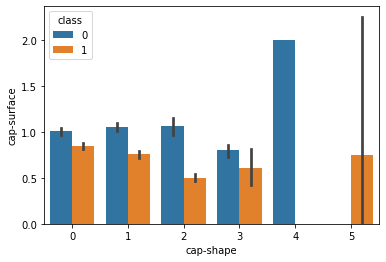

In [11]:
sns.barplot(x=df['cap-shape'],y=df['cap-surface'],hue=df['class'])

In [12]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
print(X)
print(y)

      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0             0            1          0        1     6                0   
1             0            1          3        1     4                0   
2             3            1          4        1     5                0   
3             0            0          4        1     6                0   
4             0            1          1        0     0                0   
...         ...          ...        ...      ...   ...              ...   
8119          2            1          0        0     0                1   
8120          0            1          0        0     0                1   
8121          1            1          0        0     0                1   
8122          2            0          0        0     2                0   
8123          0            1          0        0     0                1   

      gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0                0          1       

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5686, 22) (2438, 22) (5686,) (2438,)


In [15]:
model = LogisticRegression(random_state=0, max_iter=1000)

In [16]:
history = model.fit(X_train,y_train)

In [21]:
predictions = history.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [22]:
accuracy_score(y_test, predictions)*100

97.33388022969646